# Tarea 3

En el siguiente Notebook vamos a poner a prueba tu conocimiento sobre el algoritmo de Mapper vistos la clase anterior. Para ello te pedimos que completes las siguientes celdas de código con las funciones necesarias para poder ejecutar el algoritmo de Mapper en las siguientes bases de datos.

## Base de Datos 1.

La siguiente base de datos contiene la información de las calificiones de Matemáticas, Redacción y Lectura de algunos estudiantes de Estados Unidos en el 2015, de igual manera contiene información de nivel de estudios de los padres, raza, sexo, alimentación en la escuela. 

La base de datos se puede encontrar en el siguiente [link](https://www.kaggle.com/spscientist/students-performance-in-exams)



In [1]:
# quita los putos warnings
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
performance_data=pd.read_csv('StudentsPerformance.csv')
performance_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
performance_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Notemos que en los tres examenes, el promedio fue de 70 puntos, con una desviación estándar de 15 puntos (aproximadamente). Esta información la tomaremos en cuenta en el futuro.


Usualmente las calificaciones tienen una distribución normal, por lo que utilizaremos la cubierta en cuartiles para visualizar la información, por ejemplo si nuestros cuartiles tienen un traslape del 2%, entonces estos serían:

$$(0,26),(24,51),(49,76),(74,100).$$

Antes de decidir que vamos a estudiar, saquemos la información de los scores que tenemos.

In [5]:
data = performance_data[['math score','reading score','writing score']].to_numpy()

Supongamos que queremos conocer la relación que tiene el score de matemáticas con los otros dos (si este influye). Para esto, podemos utilizar mapper proyectando los datos en la variable que mide el score de matemáticas, esto es:

$$(math\,score,reading\,score,writing\,score)\mapsto math\,score.$$

Esta es una función de $\mathbb{R}^3\to\mathbb{R}.$ 

Como me interesa conocer que pasa con los otros dos scores, voy a utilizar su promedio para colorear los elementos del cluster.

In [6]:
# Import mapper
import kmapper as km

In [7]:
mean_outer_score=(data[:,1]+data[:,2])/2.0

In [8]:
mapper = km.KeplerMapper(verbose=1)
# La proyección sobre el math score, corresponde a proyectar sobre la primera columna de data
projected_data = mapper.fit_transform(data, projection=[0] ) # Math score


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [9]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [10]:
import sklearn

In [11]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 4 hypercubes.

Created 12 edges and 16 nodes in 0:00:00.518968.


In [12]:
import numpy as np

In [13]:
mapper.visualize(G, 
                title='Performance Data based on Math Score and Mean of other two',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_outer_score,
                color_function_name = 'Mean of Reading and Writing Score',
                node_color_function=np.array(['average','std','sum','max','min']));



Wrote visualization to: mapper_visualization_output.html


# Base de Datos 2:

Exploración Nivel 2:

Descargar el SP500_tickernames (1).txt

estudiaremos una base de datos de acciones bursátiles. Cabe mencionar que, la elección de los parámetros de Mapper depende del problema que estemos trabajando, y no hay un óptimo como tal, todo depende de lo que queramos estudiar. Con esta base de datos, queremos estudiar aquellas acciones que se parezcan entre ellas, es decir, que tengan un comportamiento similar en el mercado.

El índice Standard & Poor's 500 (Standard & Poor's 500 Index), también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado. Se trabajará un archivo de ticketmaster.

Antes de trabajar con el archivo se debe preparar:

Leer el archivo

* Definir el rango de fechas

* Obtenga los datos históricos

* Obtenga precios de cierre diarios y elimine las columnas que faltan

* Para aplicar el algoritmo de Mapper de manera adecuada, convierta esta base de datos en una matriz de datos, donde cada fila corresponde a una acción y cada columna corresponde a un día. De igual manera estandarice los datos para que todos tengan la misma escala (esto con el objeto de que nuestros no estén tan dispersos).

La razón de retorno de una inversión es la ganancia o pérdida que se obtiene en una inversión en relación con la cantidad invertida inicialmente. El porcentaje de retorno se calcula dividiendo la ganancia o pérdida neta por el costo original de la inversión. Esta tasa de rendimiento permite a los inversores comparar el éxito de una inversión con otras.
Calcula el porcentaje de retorno (de la inversión) de cada ticket sobre el rango de fechas
Proyectar utilizando funciones nuevas: 

Para este caso particular usaremos una proyección dada por el isomap, que es un algoritmo de reducción de dimensionalidad. Intuitivamente, el isomap encuentra una representación de los datos en un espacio de menor dimensión, donde la distancia entre dos puntos es la distancia geodésica (distancia que minimiza la energía) a lo largo de los puntos más cercanos en los datos originales.

Notemos que a nuestra proyección le pedimos n_components=500, lo cual indica que la cubierta en la imágen tendrá 500 abiertas. Dependiente la cantidad de componentes que pidamos, nuestro gráfo cambia de complejidad (más componentes, más nodos y aristas, o menos, o inexistencia).

El UMAP sirve para dar cierta categorización a los datos cuando no son claras las categorías, el UMAP es un algoritmo avanzado que necesita de muchos requerimientos y que no son parte del curso, pero que es importante mencionar para este ejemplo. No nos centraremos mucho en lo que hace UMAP, pero quedense con la idea de la categorización.

Proyecta los datos a dos dimensiones usando dos transformaciones:
 * Coordenada 1 isomap https://en.wikipedia.org/wiki/Isomap Links to an external site. 
 * Coordenada 2 UMAP https://arxiv.org/abs/1802.03426 Links to an external site. 

Una vez obtenida la proyección y el número de abiertos en la cubierta de la imágen. Procede a pedir a mapper que en nuestra proyección, nos haga un clustering de los datos y nos cree el gráfo. Para ello, usa la función mapper.map().

En este caso usamos la proyección descrita anteriormente, y como clusterer usaremos DBSCAN con la métrica del coseno. La métrica del coseno nos indica que tan parecidos son dos vectores o dos pendientes. Como queremos conocer el comportamiento de las acciones (sus ascensos y descensos) esta métrica es ideal.

Una vez que ya apliques el algoritmo a nuestros datos, vamos a visualizarlos. Para ello, usa la función mapper.visualize()

En teoría, si todo salió bien, cada componente conexa del gráfo debería contener información de comportamiento similar en los elementos del nodo.



In [14]:
# Sacar las proyecciones de yfinance con la lista de nombres en SP500_tickernames
# Leemos los nombres del txt
import numpy as np
tickernames = np.loadtxt('SP500_tickernames.txt',dtype='str')
# Imprime el numero de tickers
print(len(tickernames))

495


In [15]:
# Ahora con esos nombres usar yfinance para sacar los datos
import yfinance as yf
start = "2020-01-01"
end = "2024-2-10"
# Joint the text with spaces between
data_raw = yf.download(" ".join(tickernames), start=start, end=end)['Adj Close'];

[*********************100%%**********************]  495 of 495 completed

24 Failed downloads:
['BLL', 'PBCT', 'DRE', 'CTXS', 'NLOK', 'CERN', 'FRC', 'DISH', 'ANTM', 'NLSN', 'FBHS', 'ABC', 'INFO', 'VIAC', 'CDAY', 'FB', 'PKI', 'XLNX', 'TWTR', 'DISCA', 'DISCK', 'RE', 'ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
['SIVB']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [50]:
data = data_raw

In [51]:
# Vemos los nombres de las columnas
print (data.shape)
# Quita las columnas con NaN
data = data.dropna(axis=1)
# Vemos la forma de los datos
print (data.shape)
# Estandariza los datos
#data = (data - data.mean())/data.std()

(1034, 495)
(1034, 469)


In [52]:
# Usemos isomap para hacer la proyección a 2D
from sklearn import manifold
import numpy as np


In [53]:
# Creamos los retornos de inversion con respecto al primer dia y el ultimo y sacamos el porcentaje
# Proyecta sobre el retorno 
data = data / (data.iloc[0] + 1e-10) - 1

In [54]:
# Use Isomap to transform the data to 2D
n_neighbors = 15
n_components = 2
X_iso = manifold.Isomap(n_components=n_components, n_neighbors=n_neighbors).fit_transform(data.T)
# Vemos la forma de los datos
print (X_iso.shape)

(469, 2)


In [55]:
# Ahora vamos a hacer el mapper
mapper = km.KeplerMapper(verbose=1)

# Project the data
projected_data = mapper.fit_transform(X_iso, projection=[0,1] ) # Math score

covering=km.Cover(n_cubes=4,perc_overlap=0.2)

import sklearn

G = mapper.map(projected_data, data.T, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

import numpy as np

mapper.visualize(G,
                title='SP500 Data based on Isomap',
                custom_tooltips = tickernames,
                node_color_function=np.array(['average','std','sum','max','min']));



KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (469, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (469, 1034) using lens shaped (469, 2)

Creating 16 hypercubes.

Created 21 edges and 20 nodes in 0:00:00.057035.
Wrote visualization to: mapper_visualization_output.html


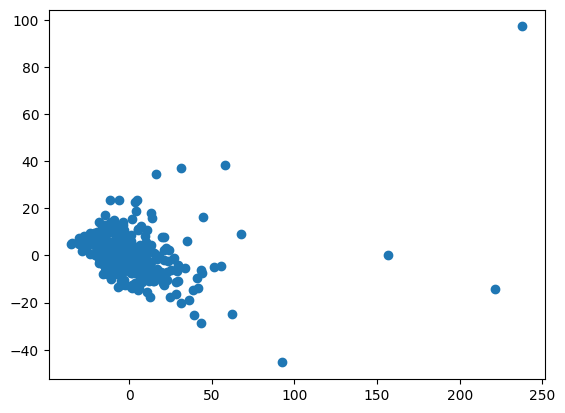

In [56]:
# Scatter plot de los datos
import matplotlib.pyplot as plt

plt.scatter(X_iso[:,0],X_iso[:,1])
plt.show()

In [57]:
# use the umap to project the data
import umap

n_neighbors = 15
n_components = 2

umapper = umap.UMAP(n_neighbors=n_neighbors,
                        n_components=n_components,
                        metric='euclidean')

In [58]:
X_umap = umapper.fit_transform(data.T)

In [59]:
X_umap.shape

(469, 2)

In [60]:
# Ahora vamos a hacer el mapper
mapper = km.KeplerMapper(verbose=1)

# Project the data
projected_data = mapper.fit_transform(X_umap, projection=[0,1] ) # Math score

covering=km.Cover(n_cubes=4,perc_overlap=0.3)

import sklearn

G = mapper.map(projected_data, data.T, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

import numpy as np

mapper.visualize(G,
                title='SP500 Data based on UMAP',
                custom_tooltips = tickernames,
                node_color_function=np.array(['average','std','sum','max','min']));



KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (469, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (469, 1034) using lens shaped (469, 2)

Creating 16 hypercubes.

Created 93 edges and 52 nodes in 0:00:00.388433.
Wrote visualization to: mapper_visualization_output.html


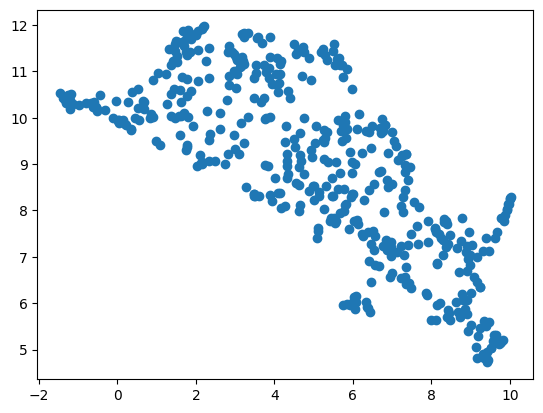

In [61]:
# Scatter the data
import matplotlib.pyplot as plt

plt.scatter(X_umap[:,0],X_umap[:,1])

plt.show()

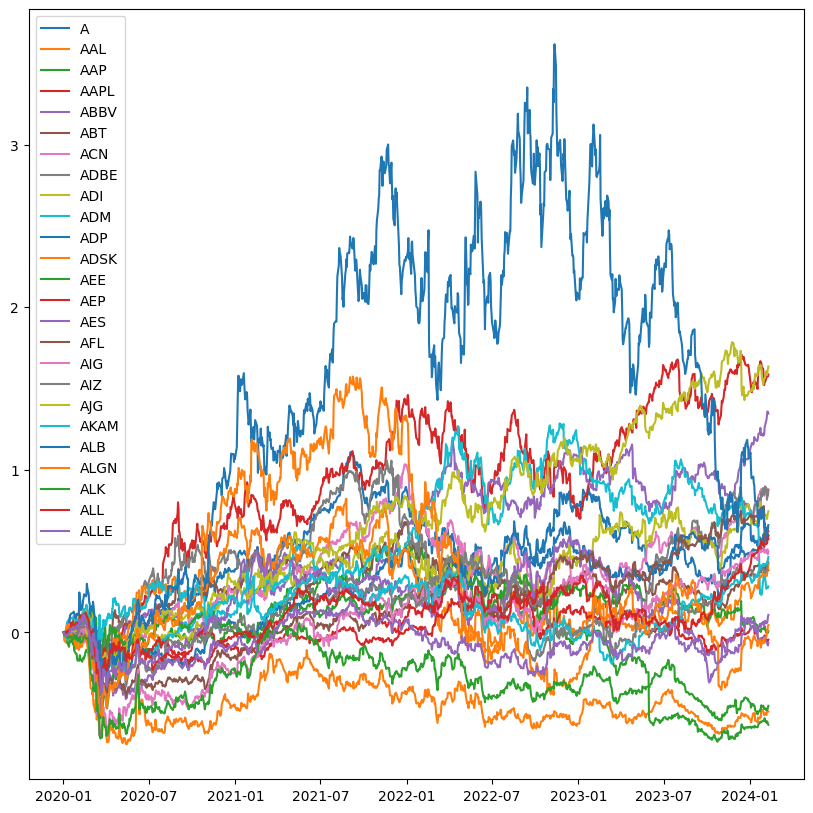

In [62]:
# plot the data
import matplotlib.pyplot as plt
# Agarramos un subconjunto de los datos
sub_data = data.iloc[:,0:25]
plt.figure(figsize=(10,10))
plt.plot(sub_data)
plt.legend(sub_data.columns)
plt.show()

In [63]:
for node in G['nodes']:
    print (node)

cube0_cluster0
cube0_cluster1
cube0_cluster2
cube0_cluster3
cube1_cluster0
cube1_cluster1
cube1_cluster2
cube1_cluster3
cube2_cluster0
cube2_cluster1
cube2_cluster2
cube2_cluster3
cube3_cluster0
cube3_cluster1
cube3_cluster2
cube3_cluster3
cube4_cluster0
cube4_cluster1
cube4_cluster2
cube4_cluster3
cube5_cluster0
cube5_cluster1
cube5_cluster2
cube5_cluster3
cube6_cluster0
cube6_cluster1
cube6_cluster2
cube6_cluster3
cube7_cluster0
cube7_cluster1
cube7_cluster2
cube7_cluster3
cube8_cluster0
cube8_cluster1
cube8_cluster2
cube8_cluster3
cube9_cluster0
cube9_cluster1
cube9_cluster2
cube9_cluster3
cube10_cluster0
cube10_cluster1
cube10_cluster2
cube10_cluster3
cube11_cluster0
cube11_cluster1
cube11_cluster2
cube11_cluster3
cube12_cluster0
cube12_cluster1
cube12_cluster2
cube12_cluster3


In [69]:
# Ver los nodos o cluster y cual es es el que tiene la media de retorno mas alta
# Vamos a ver los nodos
max_mean = (-np.inf,0) # (max_mean, node) 
for node in G['nodes']:
    # Analizamos el promedio de los ultimos dias de 
    mean = np.mean(data.iloc[:,G['nodes'][node]],axis=1).mean()
    print (mean)
    if mean > max_mean[0]:
        # Se guarda solo si el cluster tiene mas de 10 elementos
        if len(G['nodes'][node]) >=5:
            max_mean = (mean,node)

print(max_mean)

0.0013868229648010275
-0.42205185544064533
-0.14978374136762357
-0.15627054821615957
-0.09613592088385722
-0.0469383027687964
-0.42205185544064533
-0.17750375730198326
0.1871205310283093
0.2327660416455136
0.2821956893368868
0.323975876195212
0.2159750299391296
0.14166085517822355
0.02429753680848845
0.006406816222097037
-0.07892777703747438
0.04927100225160245
-0.04479455217317522
0.0944020509323147
0.5047087149693729
0.45509523647487754
0.9177047956320175
0.28976252285519305
0.3214510952778862
0.2994271113492153
0.27670723167781647
0.45439889652757093
0.23684763591136732
0.29146750078641054
0.2571701318972128
0.1984388172936731
0.23769999113142093
0.07561492417230536
0.16536159617763782
0.09470038791015643
0.6944639109865803
6.606340659025935
5.316696623161411
1.4488824663717568
0.5832750842906441
0.621855131791595
0.210530086233127
0.4386603198685959
0.156459120166154
0.3160885153590885
0.26687120101347206
0.2952844446569299
0.21450606386903567
0.19580579493033282
0.2184042748844435

[20, 32, 51, 76, 152, 162, 172, 253, 271, 287, 312, 313, 320, 353, 376, 382]


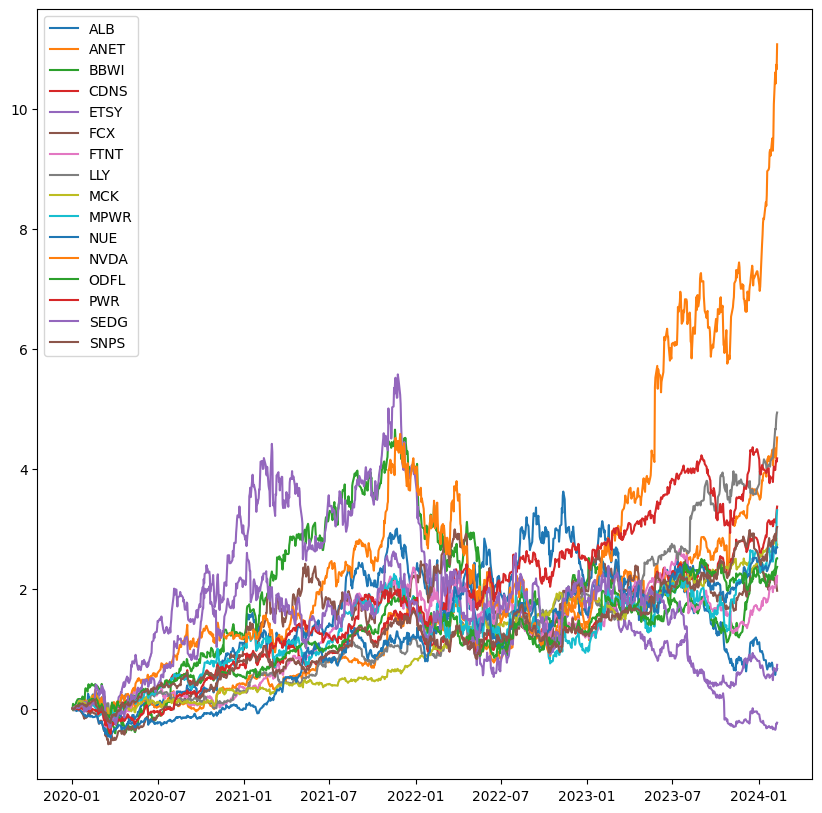

In [70]:
cluster = 0
# indices de los mejores
indices = G['nodes'][max_mean[1]]
print (indices)
# Agarramos los nombres de los tickers
data_cluster = data.iloc[:,indices]

plt.figure(figsize=(10,10))
plt.plot(data_cluster)
plt.legend(data_cluster.columns)
plt.show()

En esta grafica se puede ver como los nodos se agrupan en clusters, donde cada cluster representa un comportamiento similar en el mercado. En este especifico, se busco aquellos cuya media de retorno sea las mas alta, es decir, aquellos que tengan un comportamiento similar en el mercado que sea bueno. Y como se puede ver, se obtuvo el grupo de acciones que tienen un comportamiento alcista en el mercado o que su retorno en la mayoría de los días es positivo.